# Compute final scores

In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
import os
import json
import PIL.Image
import random
import numpy as np
import matplotlib.pyplot as plt
from math import floor, ceil

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision

from src.data.PascalVOC import dataset_voc, prepare_dataloaders_pascal_voc
from src.attacks.attacks import FastGradientSign, ProjectedGradientDescent, UniversalAttack
from src.training.Trainer import Trainer
from src.optim.scheduler import CustomScheduler

from src.explainability.distances import _get_bounding_maps_vec_NEW, hellinger_distance_vec_NEW
from src.explainability.distances import compute_weighted_iou_mult_class_vec_NEW, get_weighted_iou_mult_class_vec_NEW
from src.explainability.distances import get_bounding_boxes_vec, resize_bounding_boxes, _expand_with_zeros

In [3]:
def seed_everything(seed_value=4995):
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything()

In [3]:
def load_model(num_classes = 20, model_path = None, to_cuda = True):
    if not model_path:
        model = torchvision.models.resnet18(pretrained = True)

#### get models

In [ ]:
pascal_net_vulnerable_path = 
pascal_net_pgd_robust_path = 
mnist_net_vulnerable_path = 
mnist_net_pgd_robust_path = 

In [ ]:
# define networks
pascal_net_vulnerable = fine tuned
pascal_net_pgd_robust = msls # copy load model from train pascal
mnist_net_vulnerable = simple_cnn
mnist_net_pgd_robust = simple_cnn_adv # copy load_model from heatmaps

### get heatmaps

In [4]:
# retrieve computed heatmaps

# folder = /heatmaps
# take function from compute heatmaps

# pascal: save pascal heatmap.py

heatmaps = {}
heatmaps["pascal_vulnerable_normal"] = {}
heatmaps["pascal_vulnerable_pgd"] = {}
heatmaps["pascal_vulnerable_up"] = {}
heatmaps["pascal_pgd_robust_normal"] = {}
heatmaps["pascal_pgd_robust_pgd"] = {}
heatmaps["pascal_pgd_robust_up"] = {}
#heatmaps["pascal_up_robust_normal"] = {}
#heatmaps["pascal_up_robust_pgd"] = {}
#heatmaps["pascal_up_robust_up"] = {}
heatmaps["mnist_vulnerable_normal"] = {}
heatmaps["mnist_vulnerable_pgd"] = {}
heatmaps["mnist_vulnerable_up"] = {}
heatmaps["mnist_pgd_robust_normal"] = {}
heatmaps["mnist_pgd_robust_pgd"] = {}
heatmaps["mnist_pgd_robust_up"] = {}
#heatmaps["mnist_up_robust_normal"] = 
#heatmaps["mnist_up_robust_pgd"] = 
#heatmaps["mnist_up_robust_up"] = 

## MNIST

In [ ]:
heatmaps_mnist_vulnerable_normal_path = os.path.join(os.path.abspath(""),"heatmaps/mnist_normal_order_pred_true.npy")
heatmaps_mnist_vulnerable_pgd_perturbed_path =  os.path.join(os.path.abspath(""),"heatmaps/mnist_normal_network_perturbed_images_order_pred_true.npy")
heatmaps_mnist_pgd_robust_normal_path = os.path.join(os.path.abspath(""),"heatmaps/mnist_adv_trained_normal_images_order_pred_true.npy")
heatmaps_mnist_pgd_robust_pgd_perturbed_path = os.path.join(os.path.abspath(""),"heatmaps/mnist_adv_trained_perturbed_images_order_pred_true.npy")


In [9]:
heatmaps_mnist_vulnerable_normal_path = os.path.join("/home/wh2529/dlnn-project/","heatmaps/mnist_normal_order_pred_true.npy")
heatmaps_mnist_vulnerable_pgd_perturbed_path =  os.path.join("/home/wh2529/dlnn-project/","heatmaps/mnist_normal_network_perturbed_images_order_pred_true.npy")
heatmaps_mnist_pgd_robust_normal_path = os.path.join("/home/wh2529/dlnn-project/","heatmaps/mnist_adv_trained_normal_images_order_pred_true.npy")
heatmaps_mnist_pgd_robust_pgd_perturbed_path = os.path.join("/home/wh2529/dlnn-project/","heatmaps/mnist_adv_trained_perturbed_images_order_pred_true.npy")


In [10]:
with open(heatmaps_mnist_vulnerable_normal_path, 'rb') as f:
    heatmaps["mnist_vulnerable_normal"]["pred"] = torch.from_numpy(np.load(f))
    heatmaps["mnist_vulnerable_normal"]["gt"] = torch.from_numpy(np.load(f))
with open(heatmaps_mnist_vulnerable_pgd_perturbed_path, 'rb') as f:
    heatmaps["mnist_vulnerable_pgd"]["pred"] = torch.from_numpy(np.load(f))
    heatmaps["mnist_vulnerable_pgd"]["gt"] = torch.from_numpy(np.load(f))
with open(heatmaps_mnist_pgd_robust_normal_path, 'rb') as f:
    heatmaps["mnist_pgd_robust_normal"]["pred"] = torch.from_numpy(np.load(f))
    heatmaps["mnist_pgd_robust_normal"]["gt"] = torch.from_numpy(np.load(f))
with open(heatmaps_mnist_pgd_robust_pgd_perturbed_path, 'rb') as f:
    heatmaps["mnist_pgd_robust_pgd"]["pred"] = torch.from_numpy(np.load(f))
    heatmaps["mnist_pgd_robust_pgd"]["gt"] = torch.from_numpy(np.load(f))

In [11]:
for key, item in  heatmaps.items():
    for key_key, item_item in item.items():
        print(f"{key} {key_key} shape: {item_item.size()}")
#heatmaps["mnist_vulnerable_pgd"]["gt"].shape

mnist_vulnerable_normal pred shape: torch.Size([10000, 28, 28])
mnist_vulnerable_normal gt shape: torch.Size([10000, 28, 28])
mnist_vulnerable_pgd pred shape: torch.Size([10000, 28, 28])
mnist_vulnerable_pgd gt shape: torch.Size([10000, 28, 28])
mnist_pgd_robust_normal pred shape: torch.Size([10000, 28, 28])
mnist_pgd_robust_normal gt shape: torch.Size([10000, 28, 28])
mnist_pgd_robust_pgd pred shape: torch.Size([10000, 28, 28])
mnist_pgd_robust_pgd gt shape: torch.Size([10000, 28, 28])


In [52]:
torch.equal(heatmaps["mnist_vulnerable_normal"]["pred"],heatmaps["mnist_vulnerable_normal"]["gt"])
heatmaps["mnist_vulnerable_normal"]["pred"][heatmaps["mnist_vulnerable_normal"]["pred"]!=heatmaps["mnist_vulnerable_normal"]["gt"]]

tensor([1.9819e-05, 1.9819e-05, 1.9819e-05,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00], dtype=torch.float64)

### bboxes

In [13]:
from src.data.MNIST import get_mnist_bounding_box_data_loader

#pascal_dir =
MNIST_path = os.path.join(os.path.abspath(""),"Data/")
MNIST_path = os.path.join("/home/wh2529/dlnn-project/Data/PascalVOC/VOCdevkit/VOC2012")

dataloaders_bb_mnist = get_mnist_bounding_box_data_loader(MNIST_path)
val_loader = dataloaders_bb_mnist['val']
len(val_loader.dataset)

10000

In [14]:
mnist_val_bboxes = []
for batch in val_loader:
    #print(len(batch["bounding_box"]))
    #print(batch["bounding_box"][0][0])
    for i_img in range(len(batch["bounding_box"][0])):
        bbox = [int(batch["bounding_box"][0][i_img]),
            int(batch["bounding_box"][1][i_img]),
            int(batch["bounding_box"][2][i_img]),
            int(batch["bounding_box"][3][i_img])]
        #print(bbox)
        mnist_val_bboxes.append(bbox)
        #print(bbox)
print(len(mnist_val_bboxes))

10000


In [12]:
mnist_val_bboxes[0]

[6, 7, 21, 26]

In [15]:
mnist_val_bounding_maps = _get_bounding_maps_vec_NEW((28,28),mnist_val_bboxes, 1, False)

In [14]:
print(mnist_val_bounding_maps.size())
print(heatmaps["mnist_pgd_robust_normal"]["gt"].size())

torch.Size([10000, 1, 28, 28])
torch.Size([10000, 28, 28])


torch.Size([28, 28])
[7, 3, 26, 22]
torch.Size([28, 28])
tensor(0.0042, dtype=torch.float64)


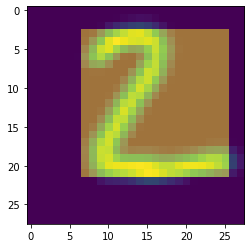

In [16]:
fig, ax = plt.subplots(1,1)
ax.imshow(heatmaps["mnist_pgd_robust_normal"]["gt"][1])
ax.imshow(mnist_val_bounding_maps[1][0],alpha=0.5)
print(heatmaps["mnist_pgd_robust_normal"]["gt"][1].size())
print(mnist_val_bboxes[1])
print(mnist_val_bounding_maps[1][0].size())
print(torch.max(heatmaps["mnist_pgd_robust_normal"]["gt"][1]))

In [21]:
#### CAUTION
wious = {}

In [22]:
wious["mnist_vulnerable_normal_gt"] = get_weighted_iou_mult_class_vec_NEW(
    heatmaps["mnist_vulnerable_normal"]["gt"], mnist_val_bounding_maps)
wious["mnist_vulnerable_normal_pred"] = get_weighted_iou_mult_class_vec_NEW(
    heatmaps["mnist_vulnerable_normal"]["pred"], mnist_val_bounding_maps)
wious["mnist_vulnerable_pgd_gt"] = get_weighted_iou_mult_class_vec_NEW(
    heatmaps["mnist_vulnerable_pgd"]["gt"], mnist_val_bounding_maps)
wious["mnist_vulnerable_pgd_pred"] = get_weighted_iou_mult_class_vec_NEW(
    heatmaps["mnist_vulnerable_pgd"]["pred"], mnist_val_bounding_maps)

wious["mnist_pgd_robust_normal_gt"] = get_weighted_iou_mult_class_vec_NEW(
    heatmaps["mnist_pgd_robust_normal"]["gt"], mnist_val_bounding_maps)
wious["mnist_pgd_robust_normal_pred"] = get_weighted_iou_mult_class_vec_NEW(
    heatmaps["mnist_pgd_robust_normal"]["pred"], mnist_val_bounding_maps)
wious["mnist_pgd_robust_pgd_gt"] = get_weighted_iou_mult_class_vec_NEW(
    heatmaps["mnist_pgd_robust_pgd"]["gt"], mnist_val_bounding_maps)
wious["mnist_pgd_robust_pgd_pred"] = get_weighted_iou_mult_class_vec_NEW(
    heatmaps["mnist_pgd_robust_pgd"]["pred"], mnist_val_bounding_maps)


intersections torch.Size([10000, 1, 28, 28])
unions torch.Size([10000, 1, 28, 28])
weighted_ious_per_bounding_map torch.Size([10000, 1, 1, 1, 1])
weighted_ious_per_heatmap torch.Size([10000, 1, 1])
weighted_ious_per_img torch.Size([10000])
intersections torch.Size([10000, 1, 28, 28])
unions torch.Size([10000, 1, 28, 28])
weighted_ious_per_bounding_map torch.Size([10000, 1, 1, 1, 1])
weighted_ious_per_heatmap torch.Size([10000, 1, 1])
weighted_ious_per_img torch.Size([10000])
intersections torch.Size([10000, 1, 28, 28])
unions torch.Size([10000, 1, 28, 28])
weighted_ious_per_bounding_map torch.Size([10000, 1, 1, 1, 1])
weighted_ious_per_heatmap torch.Size([10000, 1, 1])
weighted_ious_per_img torch.Size([10000])
intersections torch.Size([10000, 1, 28, 28])
unions torch.Size([10000, 1, 28, 28])
weighted_ious_per_bounding_map torch.Size([10000, 1, 1, 1, 1])
weighted_ious_per_heatmap torch.Size([10000, 1, 1])
weighted_ious_per_img torch.Size([10000])
intersections torch.Size([10000, 1, 28, 

intersections torch.Size([10000, 1, 28, 28])
unions torch.Size([10000, 1, 28, 28])
weighted_ious_per_bounding_map torch.Size([10000, 1, 1, 1, 1]) tensor([[[[[0.0000]]]],



        [[[[0.0001]]]],



        [[[[0.0003]]]],



        ...,



        [[[[0.0001]]]],



        [[[[0.0004]]]],



        [[[[0.0002]]]]], dtype=torch.float64)
weighted_ious_per_heatmap torch.Size([10000, 1, 1]) tensor([[[0.0000]],

        [[0.0001]],

        [[0.0003]],

        ...,

        [[0.0001]],

        [[0.0004]],

        [[0.0002]]], dtype=torch.float64)
weighted_ious_per_img torch.Size([10000]) tensor([0.0000, 0.0001, 0.0003,  ..., 0.0001, 0.0004, 0.0002],
       dtype=torch.float64)


In [23]:
for key, val in wious.items():
    print(f"{key}:\t{torch.mean(val)} \t +/- {torch.std(val)}")

mnist_vulnerable_normal_gt:	0.0006307614931778128 	 +/- 0.0004389308133738842
mnist_vulnerable_normal_pred:	0.000630706080564945 	 +/- 0.0004409946779956424
mnist_vulnerable_pgd_gt:	0.000874571436031384 	 +/- 0.00046580636991986674
mnist_vulnerable_pgd_pred:	0.0007343281449787463 	 +/- 0.0004538406585077202
mnist_pgd_robust_normal_gt:	0.0015663240303516828 	 +/- 0.0007312653180790875
mnist_pgd_robust_normal_pred:	0.0015757501635838315 	 +/- 0.0007242696313510567
mnist_pgd_robust_pgd_gt:	0.0013121051552339618 	 +/- 0.0006681541825278486
mnist_pgd_robust_pgd_pred:	0.001357898938081362 	 +/- 0.0006574882837898054


In [69]:
for key, val in wious.items():
    print(f"{key}:\t{torch.mean(val)} \t +/- {torch.std(val)}")

mnist_vulnerable_normal_gt:	0.0006307614931778128 	 +/- 0.0004389308133738842
mnist_vulnerable_normal_pred:	0.000630706080564945 	 +/- 0.0004409946779956424
mnist_vulnerable_pgd_gt:	0.000874571436031384 	 +/- 0.00046580636991986674
mnist_vulnerable_pgd_pred:	0.0007343281449787463 	 +/- 0.0004538406585077202
mnist_pgd_robust_pgd_gt:	0.0013121051552339618 	 +/- 0.0006681541825278486
mnist_pgd_robust_pgd_pred:	0.001357898938081362 	 +/- 0.0006574882837898054


In [26]:
# Hellinger distance
hd = {}

In [27]:
hd["mnist_vulnerable_normal_gt"] = hellinger_distance_vec_NEW(
    heatmaps["mnist_vulnerable_normal"]["gt"], heatmaps["mnist_pgd_robust_normal"]["gt"])
hd["mnist_vulnerable_normal_pred"] = hellinger_distance_vec_NEW(
    heatmaps["mnist_vulnerable_normal"]["pred"], heatmaps["mnist_pgd_robust_normal"]["pred"])

hd["mnist_vulnerable_pgd_gt"] = hellinger_distance_vec_NEW(
    heatmaps["mnist_vulnerable_pgd"]["gt"], heatmaps["mnist_pgd_robust_pgd"]["gt"])
hd["mnist_vulnerable_pgd_pred"] = hellinger_distance_vec_NEW(
    heatmaps["mnist_vulnerable_pgd"]["pred"], heatmaps["mnist_pgd_robust_pgd"]["pred"])

torch.Size([10000, 28, 28]) torch.Size([10000, 28, 28])
torch.Size([10000, 28, 28]) torch.Size([10000, 28, 28])
torch.Size([10000, 28, 28]) torch.Size([10000, 28, 28])
torch.Size([10000, 28, 28]) torch.Size([10000, 28, 28])


In [31]:
hd["mnist_vulnerable_normal_gt"][0]

tensor([[0.7734]], dtype=torch.float64)

In [29]:
for key, val in hd.items():
    print(f"{key}:\t{torch.mean(val)} \t +/- {torch.std(val)}")

mnist_vulnerable_normal_gt:	0.4719760324190206 	 +/- 0.2089871788396804
mnist_vulnerable_normal_pred:	0.4745959073583813 	 +/- 0.20915068519503327
mnist_vulnerable_pgd_gt:	0.479029296043874 	 +/- 0.1764465522749056
mnist_vulnerable_pgd_pred:	0.5412569147984887 	 +/- 0.1894796963396032


## Pascal VOC

bounding boxes

In [33]:
from src.data.PascalVOC import prepare_dataloaders_pascal_voc

In [34]:
pascal_dir = os.path.join("/home/wh2529/dlnn-project/Data/PascalVOC/VOCdevkit/VOC2012")
dataloaders, classes = prepare_dataloaders_pascal_voc(pascal_dir)

In [35]:
filenames = []
for batch in dataloaders["val"]:
    for i_img in range(len(batch["filename"])):
        filenames.append(batch["filename"][i_img].split(".")[0].split("/")[-1] + ".xml")
    #print(len(batch["filename"]))
    #break
print(len(filenames))
#print(filenames)

5823


In [36]:
#pascal_dir = os.path.join(os.path.abspath(""),"Data/VOC2012")
pascal_bboxes_dir = os.path.join(pascal_dir,"Annotations/")

In [37]:
pascal_val_bboxes, pascal_val_sizes = get_bounding_boxes_vec(filenames, pascal_bboxes_dir, return_dict=False)
pascal_val_bboxes = resize_bounding_boxes(pascal_val_bboxes, pascal_val_sizes)
filenames=[]
print(len(pascal_val_bboxes))

5823


In [ ]:
max = 0
index = 0
for i, bboxes in enumerate(pascal_val_bboxes):
    if len(bboxes)>max:
        #print(bboxes)
        max = len(bboxes)
        index = i
print(max, index)

### Heatmaps

In [32]:
heatmaps_pascal_vulnerable_normal_path = os.path.join("/home/wh2529/dlnn-project/","heatmaps/pascal_normal_net_normal_input.npy")
heatmaps_pascal_vulnerable_pgd_perturbed_path =  os.path.join("/home/wh2529/dlnn-project/","heatmaps/pascal_normal_net_pert_input.npy")
heatmaps_pascal_pgd_robust_normal_path = os.path.join("/home/wh2529/dlnn-project/","heatmaps/pascal_robust_net_normal_input.npy")
heatmaps_pascal_pgd_robust_pgd_perturbed_path = os.path.join("/home/wh2529/dlnn-project/","heatmaps/pascal_robust_net_perturb_input.npy")

heatmap_paths = {}
heatmap_paths["pascal_vulnerable_normal"] = heatmaps_pascal_vulnerable_normal_path
heatmap_paths["pascal_vulnerable_pgd"] = heatmaps_pascal_vulnerable_pgd_perturbed_path
heatmap_paths["pascal_pgd_robust_normal"] = heatmaps_pascal_pgd_robust_normal_path
heatmap_paths["pascal_pgd_robust_pgd"] = heatmaps_pascal_pgd_robust_pgd_perturbed_path


In [34]:
ceil(len(pascal_val_bboxes)/200)

30

In [28]:
# PRE MAIN
# CAUTION
wious_pascal = {"pascal_vulnerable_normal": {"gt":[], "pred":[]}, 
                "pascal_vulnerable_pgd": {"gt":[], "pred":[]},
               "pascal_pgd_robust_normal": {"gt":[], "pred":[]},
               "pascal_pgd_robust_pgd": {"gt":[], "pred":[]}}

In [54]:
# PRE MAIN
part = "pascal_pgd_robust_pgd"
with open(heatmap_paths[part], 'rb') as f:
        heatmaps[part]["pred"] = torch.from_numpy(np.load(f))
        heatmaps[part]["gt"] = torch.from_numpy(np.load(f))
        heatmaps[part]["pred_nums"] = torch.from_numpy(np.load(f))
        heatmaps[part]["gt_nums"] = torch.from_numpy(np.load(f))
        heatmaps[part]["pred_labels"] = torch.from_numpy(np.load(f))
        heatmaps[part]["gt_labels"] = torch.from_numpy(np.load(f))

In [55]:
# MAIN
chunk = 200

counters_gt = [0]
counters_pred = [0]
for i in range(ceil(len(pascal_val_bboxes)/chunk)):
    # part bounding_maps from all bounding_boxes
    pascal_val_bounding_maps = _get_bounding_maps_vec_NEW((256,256),pascal_val_bboxes[i*chunk:(i+1)*chunk],46, input_dict=False)
    
    # part heatmaps (post-processing from storage) from all heatmaps        
    my_heatmaps_nums = {}
    my_heatmaps_nums["pred_nums"] = heatmaps[part]["pred_nums"][i*chunk:(i+1)*chunk]
    my_heatmaps_nums["gt_nums"] = heatmaps[part]["gt_nums"][i*chunk:(i+1)*chunk]
    
    my_heatmaps_pred_list, my_heatmaps_gt_list = [], []
    counter_gt, counter_pred = counters_gt[i], counters_pred[i]
    for i_img in range(my_heatmaps_nums["pred_nums"].size()[0]):
        j_img = i_img + i*chunk # true 
        #print(my_heatmaps_nums["pred_nums"][i_img])
        num_i_pred = int(my_heatmaps_nums["pred_nums"][i_img])
        num_i_gt = int(my_heatmaps_nums["gt_nums"][i_img])
        my_heatmaps_pred_list.append(heatmaps[part]["pred"][counter_pred:counter_pred+num_i_pred])
        my_heatmaps_gt_list.append(heatmaps[part]["gt"][counter_gt:counter_gt+num_i_gt])
        counter_pred += num_i_pred
        counter_gt += num_i_gt
    counters_pred.append(counter_pred)
    counters_gt.append(counter_gt)
    
    ## turn heatmaps into tensors of right format
    for i_heatmap in range(len(my_heatmaps_pred_list)):
        my_heatmaps_pred_list[i_heatmap] = torch.unsqueeze(my_heatmaps_pred_list[i_heatmap],0)
        my_heatmaps_pred_list[i_heatmap] = _expand_with_zeros(my_heatmaps_pred_list[i_heatmap],1,5)
    my_heatmaps_pred_tensor = torch.cat(my_heatmaps_pred_list,dim=0)
    for i_heatmap in range(len(my_heatmaps_gt_list)):
        my_heatmaps_gt_list[i_heatmap] = torch.unsqueeze(my_heatmaps_gt_list[i_heatmap],0)
        my_heatmaps_gt_list[i_heatmap] = _expand_with_zeros(my_heatmaps_gt_list[i_heatmap],1,5)
    my_heatmaps_gt_tensor = torch.cat(my_heatmaps_gt_list,dim=0)
    
    # part wious computation
    wious_pascal[part]["pred"].append(get_weighted_iou_mult_class_vec_NEW(
        my_heatmaps_pred_tensor, pascal_val_bounding_maps))
    wious_pascal[part]["gt"].append(get_weighted_iou_mult_class_vec_NEW(
        my_heatmaps_gt_tensor, pascal_val_bounding_maps))

intersections torch.Size([200, 230, 256, 256])
unions torch.Size([200, 230, 256, 256])
weighted_ious_per_bounding_map torch.Size([200, 5, 46, 1, 1])
weighted_ious_per_heatmap torch.Size([200, 5, 1])
weighted_ious_per_img torch.Size([200])
intersections torch.Size([200, 230, 256, 256])
unions torch.Size([200, 230, 256, 256])
weighted_ious_per_bounding_map torch.Size([200, 5, 46, 1, 1])
weighted_ious_per_heatmap torch.Size([200, 5, 1])
weighted_ious_per_img torch.Size([200])
intersections torch.Size([200, 230, 256, 256])
unions torch.Size([200, 230, 256, 256])
weighted_ious_per_bounding_map torch.Size([200, 5, 46, 1, 1])
weighted_ious_per_heatmap torch.Size([200, 5, 1])
weighted_ious_per_img torch.Size([200])
intersections torch.Size([200, 230, 256, 256])
unions torch.Size([200, 230, 256, 256])
weighted_ious_per_bounding_map torch.Size([200, 5, 46, 1, 1])
weighted_ious_per_heatmap torch.Size([200, 5, 1])
weighted_ious_per_img torch.Size([200])
intersections torch.Size([200, 230, 256, 256

In [56]:
len(wious_pascal[part]["gt"][-1])

23

In [57]:
l = 0
for j in wious_pascal[part]["pred"]:
    l += len(j)
print(l)

5823


In [22]:
wious={}

In [58]:
# POST MAIN
for suffix in ["gt", "pred"]:
    wious[f"{part}_{suffix}"] = torch.cat(wious_pascal[part][suffix])

In [59]:
for key, val in wious.items():
    print(f"{key}:\t{torch.mean(val[~torch.isnan(val)])} \t +/- {torch.std(val[~torch.isnan(val)])}")

pascal_vulnerable_normal_gt:	0.0068834624253213406 	 +/- 0.005924316123127937
pascal_vulnerable_normal_pred:	0.007397632580250502 	 +/- 0.006244330201297998
pascal_vulnerable_pgd_gt:	0.0036462319549173117 	 +/- 0.004630392882972956
pascal_vulnerable_pgd_pred:	0.006667609792202711 	 +/- 0.005207991227507591
pascal_pgd_robust_normal_gt:	0.00546932453289628 	 +/- 0.004841305315494537
pascal_pgd_robust_normal_pred:	0.007378898561000824 	 +/- 0.005204081069678068
pascal_pgd_robust_pgd_gt:	0.005073805805295706 	 +/- 0.0047365217469632626
pascal_pgd_robust_pgd_pred:	0.007453675381839275 	 +/- 0.0051850671879947186


In [54]:
# CAUTION
hd_pascal = {"normal":{"pred":[], "gt":[]}, "pgd":{"pred":[], "gt":[]}}

In [67]:
# PRE HD MAIN
part = "pgd"

In [68]:
with open(heatmap_paths[f"pascal_vulnerable_{part}"], 'rb') as f:
        heatmaps[f"pascal_vulnerable_{part}"]["pred"] = torch.from_numpy(np.load(f))
        heatmaps[f"pascal_vulnerable_{part}"]["gt"] = torch.from_numpy(np.load(f))
        heatmaps[f"pascal_vulnerable_{part}"]["pred_nums"] = torch.from_numpy(np.load(f))
        heatmaps[f"pascal_vulnerable_{part}"]["gt_nums"] = torch.from_numpy(np.load(f))
        heatmaps[f"pascal_vulnerable_{part}"]["pred_labels"] = torch.from_numpy(np.load(f))
        heatmaps[f"pascal_vulnerable_{part}"]["gt_labels"] = torch.from_numpy(np.load(f))

In [69]:
with open(heatmap_paths[f"pascal_pgd_robust_{part}"], 'rb') as f:
        heatmaps[f"pascal_pgd_robust_{part}"]["pred"] = torch.from_numpy(np.load(f))
        heatmaps[f"pascal_pgd_robust_{part}"]["gt"] = torch.from_numpy(np.load(f))
        heatmaps[f"pascal_pgd_robust_{part}"]["pred_nums"] = torch.from_numpy(np.load(f))
        heatmaps[f"pascal_pgd_robust_{part}"]["gt_nums"] = torch.from_numpy(np.load(f))
        heatmaps[f"pascal_pgd_robust_{part}"]["pred_labels"] = torch.from_numpy(np.load(f))
        heatmaps[f"pascal_pgd_robust_{part}"]["gt_labels"] = torch.from_numpy(np.load(f))

In [75]:
heatmaps[f"pascal_pgd_robust_{part}"]["pred"].size()

torch.Size([4030, 256, 256])

In [76]:
heatmaps[f"pascal_pgd_robust_{part}"]["pred_nums"].size()

torch.Size([5823])

In [77]:
# Hellinger distance MAIN
chunk = 200

counters_vulnerable_gt = [0]
counters_vulnerable_pred = [0]
counters_robust_gt = [0]
counters_robust_pred = [0]
for i in range(ceil(len(pascal_val_bboxes)/chunk)):
    
    # part heatmaps (post-processing from storage) from all heatmaps        
    my_heatmaps_nums = {}
    my_heatmaps_nums["pred_nums_vulnerable"] = heatmaps[f"pascal_vulnerable_{part}"]["pred_nums"][i*chunk:(i+1)*chunk]
    my_heatmaps_nums["gt_nums_vulnerable"] = heatmaps[f"pascal_vulnerable_{part}"]["gt_nums"][i*chunk:(i+1)*chunk]
    my_heatmaps_nums["pred_nums_robust"] = heatmaps[f"pascal_pgd_robust_{part}"]["pred_nums"][i*chunk:(i+1)*chunk]
    my_heatmaps_nums["gt_nums_robust"] = heatmaps[f"pascal_pgd_robust_{part}"]["gt_nums"][i*chunk:(i+1)*chunk]
    
    my_heatmaps_vulnerable_pred_list, my_heatmaps_vulenerable_gt_list = [], []
    counter_gt, counter_pred = counters_vulnerable_gt[i], counters_vulnerable_pred[i]
    for i_img in range(my_heatmaps_nums["pred_nums_vulnerable"].size()[0]):
        #print(my_heatmaps_nums["pred_nums"][i_img])
        num_i_pred = int(my_heatmaps_nums["pred_nums_vulnerable"][i_img])
        num_i_gt = int(my_heatmaps_nums["gt_nums_vulnerable"][i_img])
        my_heatmaps_vulnerable_pred_list.append(heatmaps[f"pascal_vulnerable_{part}"]["pred"][counter_pred:counter_pred+num_i_pred])
        my_heatmaps_vulenerable_gt_list.append(heatmaps[f"pascal_vulnerable_{part}"]["gt"][counter_gt:counter_gt+num_i_gt])
        counter_pred += num_i_pred
        counter_gt += num_i_gt
    counters_vulnerable_pred.append(counter_pred)
    counters_vulnerable_gt.append(counter_gt)
    
    my_heatmaps_robust_pred_list, my_heatmaps_robust_gt_list = [], []
    counter_gt, counter_pred = counters_robust_gt[i], counters_robust_pred[i]
    for i_img in range(my_heatmaps_nums["pred_nums_robust"].size()[0]):
        #print(my_heatmaps_nums["pred_nums"][i_img])
        num_i_pred = int(my_heatmaps_nums["pred_nums_robust"][i_img])
        num_i_gt = int(my_heatmaps_nums["gt_nums_robust"][i_img])
        my_heatmaps_robust_pred_list.append(heatmaps[f"pascal_pgd_robust_{part}"]["pred"][counter_pred:counter_pred+num_i_pred])
        my_heatmaps_robust_gt_list.append(heatmaps[f"pascal_pgd_robust_{part}"]["gt"][counter_gt:counter_gt+num_i_gt])
        counter_pred += num_i_pred
        counter_gt += num_i_gt
    counters_robust_pred.append(counter_pred)
    counters_robust_gt.append(counter_gt)
    
    ## turn heatmaps into tensors of right format
    for i_heatmap in range(len(my_heatmaps_vulnerable_pred_list)):
        my_heatmaps_vulnerable_pred_list[i_heatmap] = torch.unsqueeze(my_heatmaps_vulnerable_pred_list[i_heatmap],0)
        my_heatmaps_vulnerable_pred_list[i_heatmap] = _expand_with_zeros(my_heatmaps_vulnerable_pred_list[i_heatmap],1,5)
    my_heatmaps_vulnerable_pred_tensor = torch.cat(my_heatmaps_vulnerable_pred_list,dim=0)
    for i_heatmap in range(len(my_heatmaps_vulenerable_gt_list)):
        my_heatmaps_vulenerable_gt_list[i_heatmap] = torch.unsqueeze(my_heatmaps_vulenerable_gt_list[i_heatmap],0)
        my_heatmaps_vulenerable_gt_list[i_heatmap] = _expand_with_zeros(my_heatmaps_vulenerable_gt_list[i_heatmap],1,5)
    my_heatmaps_vulenerable_gt_tensor = torch.cat(my_heatmaps_vulenerable_gt_list,dim=0)
    
    for i_heatmap in range(len(my_heatmaps_robust_pred_list)):
        my_heatmaps_robust_pred_list[i_heatmap] = torch.unsqueeze(my_heatmaps_robust_pred_list[i_heatmap],0)
        my_heatmaps_robust_pred_list[i_heatmap] = _expand_with_zeros(my_heatmaps_robust_pred_list[i_heatmap],1,5)
    my_heatmaps_robust_pred_tensor = torch.cat(my_heatmaps_robust_pred_list,dim=0)
    for i_heatmap in range(len(my_heatmaps_robust_gt_list)):
        my_heatmaps_robust_gt_list[i_heatmap] = torch.unsqueeze(my_heatmaps_robust_gt_list[i_heatmap],0)
        my_heatmaps_robust_gt_list[i_heatmap] = _expand_with_zeros(my_heatmaps_robust_gt_list[i_heatmap],1,5)
    my_heatmaps_robust_gt_tensor = torch.cat(my_heatmaps_robust_gt_list,dim=0)
    
    # part hellinger distance computation
    hd_pascal[part]["pred"].append(hellinger_distance_vec_NEW(
        my_heatmaps_vulnerable_pred_tensor, my_heatmaps_robust_pred_tensor))
    hd_pascal[part]["gt"].append(hellinger_distance_vec_NEW(
        my_heatmaps_vulenerable_gt_tensor, my_heatmaps_robust_gt_tensor))

torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Size([200, 5, 256, 256]) torch.Size([200, 5, 256, 256])
torch.Si

In [79]:
hd_pascal[part]["pred"][-1].size()

torch.Size([23, 5, 1, 1])

In [80]:
l = 0
for j in hd_pascal[part]["pred"]:
    l += len(j)
print(l)

5823


In [61]:
# CAUTION
hd = {}

In [81]:
# POST MAIN
for suffix in ["gt", "pred"]:
    hd[f"{part}_{suffix}"] = torch.cat(hd_pascal[part][suffix])

In [82]:
for key, val in hd.items():
    print(f"{key}:\t{torch.mean(val[~torch.isnan(val)])} \t +/- {torch.std(val[~torch.isnan(val)])}")

normal_gt:	6.54032039642334 	 +/- 3.732207775115967
normal_pred:	6.063880443572998 	 +/- 3.4365766048431396
pgd_gt:	5.0761237144470215 	 +/- 3.518789768218994
pgd_pred:	7.90211820602417 	 +/- 3.5919902324676514


In [ ]:
# how they were generated:
#with open('heatmaps/pascal_robust_net_perturb_input.npy', 'wb') as f:
#    np.save(f, adv_pert_pred_heatmap)
#    np.save(f, adv_pert_true_heatmap)
#    np.save(f, adv_pert_num_preds_pre_sample)
#    np.save(f, adv_pert_mum_labels_per_sample)
#    np.save(f, adv_pert_all_preds)
#    np.save(f, adv_pert_all_labels)

In [25]:
with open(heatmaps_pascal_vulnerable_normal_path, 'rb') as f:
    heatmaps["pascal_vulnerable_normal"]["pred"] = torch.from_numpy(np.load(f))
    heatmaps["pascal_vulnerable_normal"]["gt"] = torch.from_numpy(np.load(f))
    heatmaps["pascal_vulnerable_normal"]["pred_nums"] = torch.from_numpy(np.load(f))
    heatmaps["pascal_vulnerable_normal"]["gt_nums"] = torch.from_numpy(np.load(f))
    heatmaps["pascal_vulnerable_normal"]["pred_labels"] = torch.from_numpy(np.load(f))
    heatmaps["pascal_vulnerable_normal"]["gt_labels"] = torch.from_numpy(np.load(f))

In [90]:
for key,value in heatmaps["pascal_vulnerable_normal"].items():
    print(key, value.size(), value[0])
print(torch.max(heatmaps["pascal_vulnerable_normal"]["gt_nums"]))

pred torch.Size([6316, 256, 256]) tensor([[0.0004, 0.0004, 0.0004,  ..., 0.0005, 0.0005, 0.0005],
        [0.0004, 0.0004, 0.0004,  ..., 0.0005, 0.0005, 0.0005],
        [0.0004, 0.0004, 0.0004,  ..., 0.0005, 0.0005, 0.0005],
        ...,
        [0.0002, 0.0002, 0.0002,  ..., 0.0003, 0.0003, 0.0003],
        [0.0002, 0.0002, 0.0002,  ..., 0.0003, 0.0003, 0.0003],
        [0.0002, 0.0002, 0.0002,  ..., 0.0003, 0.0003, 0.0003]],
       dtype=torch.float64)
gt torch.Size([8351, 256, 256]) tensor([[0.0004, 0.0004, 0.0004,  ..., 0.0005, 0.0005, 0.0005],
        [0.0004, 0.0004, 0.0004,  ..., 0.0005, 0.0005, 0.0005],
        [0.0004, 0.0004, 0.0004,  ..., 0.0005, 0.0005, 0.0005],
        ...,
        [0.0002, 0.0002, 0.0002,  ..., 0.0003, 0.0003, 0.0003],
        [0.0002, 0.0002, 0.0002,  ..., 0.0003, 0.0003, 0.0003],
        [0.0002, 0.0002, 0.0002,  ..., 0.0003, 0.0003, 0.0003]],
       dtype=torch.float64)
pred_nums torch.Size([5823]) tensor(1., dtype=torch.float64)
gt_nums torch.Size([5

In [27]:
my_heatmaps_pred, my_heatmaps_gt  = [], []
counter_gt, counter_pred = 0, 0
for i_img in range(heatmaps["pascal_vulnerable_normal"]["pred_nums"].size()[0]):
    num_i_pred = int(heatmaps["pascal_vulnerable_normal"]["pred_nums"][i_img])
    num_i_gt = int(heatmaps["pascal_vulnerable_normal"]["gt_nums"][i_img])
    my_heatmaps_pred.append(heatmaps["pascal_vulnerable_normal"]["pred"][counter_pred:counter_pred+num_i_pred])
    my_heatmaps_gt.append(heatmaps["pascal_vulnerable_normal"]["gt"][counter_gt:counter_gt+num_i_gt])
    counter_pred +=num_i_pred
    counter_gt +=num_i_gt

In [28]:
len(my_heatmaps_pred)

5823

In [ ]:
for i_heatmap in range(len(my_heatmaps_pred)):
    my_heatmaps_pred[i_heatmap] = torch.unsqueeze(my_heatmaps_pred[i_heatmap],0)
    #print(my_heatmaps_pred[i_heatmap].size())
    my_heatmaps_pred[i_heatmap] = _expand_with_zeros(my_heatmaps_pred[i_heatmap],1,5)
my_heatmaps_pred_tensor = torch.cat(my_heatmaps_pred,dim=0)

In [40]:
my_heatmaps_pred[8].size()

torch.Size([1, 5, 256, 256])

In [42]:
my_heatmaps_pred_tensor.size()

torch.Size([5823, 5, 5, 256, 256])

In [ ]:
# plotting
fig, ax = plt.subplots(1,1)
ax.imshow(heatmaps["pascal_vulnerable_normal"]["pred"][0])
ax.imshow(mnist_val_bounding_maps[1][0],alpha=0.5)
print(heatmaps["mnist_pgd_robust_normal"]["gt"][1].size())
print(mnist_val_bboxes[1])
print(mnist_val_bounding_maps[1][0].size())
print(torch.max(heatmaps["mnist_pgd_robust_normal"]["gt"][1]))

In [ ]:
for key, item in  heatmaps.items():
    for key_key, item_item in item.items():
        print(f"{key} {key_key} shape: {item_item.size()}")
#heatmaps["mnist_vulnerable_pgd"]["gt"].shape